In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_madrid_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('madrid')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/madrid_{date}.csv',index=False)
get_listings_madrid_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_madrid = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_madrid)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(madrid_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17634 AirBnb listings.


In [4]:
madrid_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2020-12.csv')
madrid_raw_df_12_12_2020.shape


(20352, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for madrid
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_madrid = glob.glob('madrid/**.csv')
files_madrid

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['madrid/Madrid_2021-02.csv',
 'madrid/Madrid_2021-03.csv',
 'madrid/Madrid_2021-01.csv',
 'madrid/Madrid_2021-10.csv',
 'madrid/Madrid_2021-04.csv',
 'madrid/Madrid_2021-11.csv',
 'madrid/Madrid_2021-07.csv',
 'madrid/Madrid_2021-06.csv',
 'madrid/Madrid_2021-08.csv',
 'madrid/Madrid_2021-09.csv',
 'madrid/Madrid_2020-12.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

madrid_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(madrid_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(madrid_raw_df_12_12_2020['price'].mean(),2)}.")

madrid_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(madrid_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_1_9_2021['price'].mean(),2)}.")

madrid_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(madrid_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_2_8_2021['price'].mean(),2)}.")

madrid_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(madrid_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_3_4_2021['price'].mean(),2)}.")

madrid_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(madrid_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_4_9_2021['price'].mean(),2)}.")

#madrid_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(madrid_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_5_19_2021['price'].mean(),2)}.")

madrid_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(madrid_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_6_3_2021['price'].mean(),2)}.")

madrid_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(madrid_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_7_4_2021['price'].mean(),2)}.")

madrid_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(madrid_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_8_6_2021['price'].mean(),2)}.")

madrid_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(madrid_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_9_7_2021['price'].mean(),2)}.")

madrid_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(madrid_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_10_6_2021['price'].mean(),2)}.")

#madrid_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(madrid_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20352 AirBnb listings; the avg price is €115.76.
The 1_9_2021 dataset contains 20151 AirBnb listings; the avg price is €123.1.
The 2_8_2021 dataset contains 20156 AirBnb listings; the avg price is €127.07.
The 3_4_2021 dataset contains 20007 AirBnb listings; the avg price is €126.28.
The 4_9_2021 dataset contains 19618 AirBnb listings; the avg price is €129.27.
The 6_3_2021 dataset contains 19478 AirBnb listings; the avg price is €129.88.
The 7_4_2021 dataset contains 19612 AirBnb listings; the avg price is €128.04.
The 8_6_2021 dataset contains 19664 AirBnb listings; the avg price is €124.3.
The 9_7_2021 dataset contains 18909 AirBnb listings; the avg price is €129.57.
The 10_6_2021 dataset contains 17989 AirBnb listings; the avg price is €135.09.


In [7]:
df_list_madrid = [madrid_raw_df_12_12_2020, madrid_raw_df_1_9_2021, madrid_raw_df_2_8_2021,
           madrid_raw_df_3_4_2021, madrid_raw_df_4_9_2021, madrid_raw_df_6_3_2021, madrid_raw_df_7_4_2021,
           madrid_raw_df_8_6_2021, madrid_raw_df_9_7_2021, madrid_raw_df_10_6_2021]

dates_madrid = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_madrid = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_madrid = []

def airbnb_parse_madrid(df_list, files):
    for file in files_madrid:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/madrid/madrid_{file}.csv")
        print(f"The {file} madrid dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_madrid(df_list, dates):
    for file in files_madrid:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/madrid/madrid_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_madrid.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_madrid)

madrid_parse = airbnb_parse_madrid(df_list_madrid, files_madrid)


The 2020-12 madrid dataset contains 20352 AirBnb listings -- the avg price is €115.76.
The 2021-01 madrid dataset contains 20151 AirBnb listings -- the avg price is €123.1.
The 2021-02 madrid dataset contains 20156 AirBnb listings -- the avg price is €127.07.
The 2021-03 madrid dataset contains 20007 AirBnb listings -- the avg price is €126.28.
The 2021-04 madrid dataset contains 19618 AirBnb listings -- the avg price is €129.27.
The 2021-06 madrid dataset contains 19478 AirBnb listings -- the avg price is €129.88.
The 2021-07 madrid dataset contains 19612 AirBnb listings -- the avg price is €128.04.
The 2021-08 madrid dataset contains 19664 AirBnb listings -- the avg price is €124.3.
The 2021-09 madrid dataset contains 18909 AirBnb listings -- the avg price is €129.57.
The 2021-10 madrid dataset contains 17989 AirBnb listings -- the avg price is €135.09.


In [8]:
madrid_summary = airbnb_to_frame_madrid(df_list_madrid, files_madrid)
madrid_summary['Date of scrape'] = pd.to_datetime(madrid_summary['Date of scrape'])
madrid_summary['City'] = 'Madrid'

dfi.export(madrid_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/airbnb_madrid_summary.png")


In [9]:
master_df_madrid = pd.concat(df_list_madrid)
master_df_madrid_unique = master_df_madrid.drop_duplicates(subset='id')
master_df_madrid_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.59,1,90,NaN,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,2018-07-15,0.44,2,364,NaN,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,15,0,NaN,NaN,6,292,NaN,NaN
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,101,5,10,2020-03-01,0.14,1,88,NaN,NaN
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.58,1,358,NaN,NaN


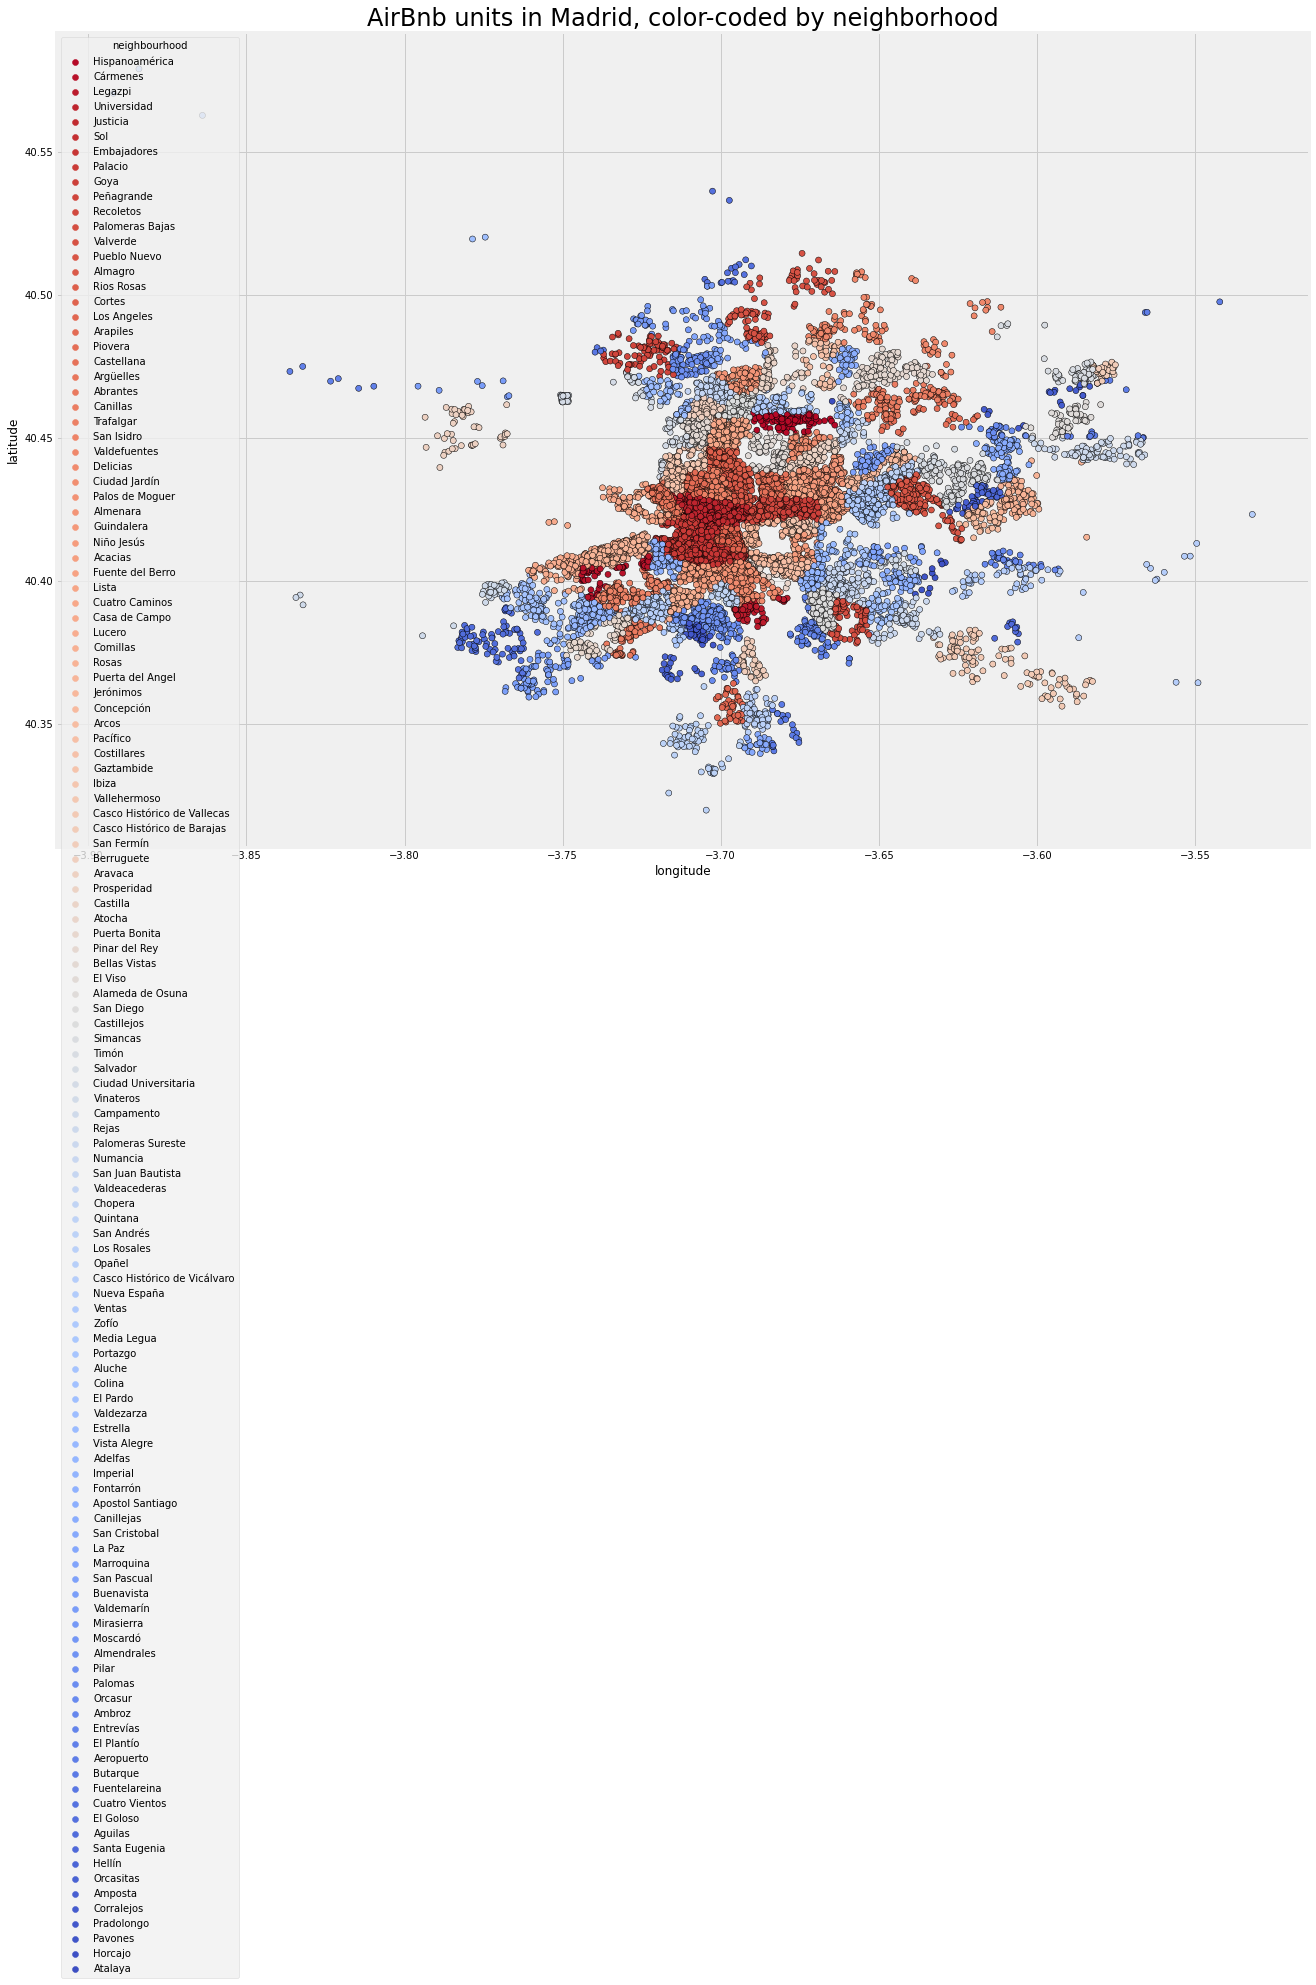

In [10]:
title = 'AirBnb units in Madrid, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_madrid_unique.longitude, master_df_madrid_unique.latitude, hue = master_df_madrid_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/airbnb_madrid_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([madrid_raw_df_10_6_2021,raw_df_madrid],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2.0    6128
4.0    3939
1.0    3026
3.0    1625
6.0    1412
5.0     751
0.0       3
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  95.93515179529892
Coefficients:  [ -3.17744705  -0.54634208   3.63265146   0.21210116  -0.91701822
   7.92020715  20.25600856  -3.51305539 -16.15176657]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


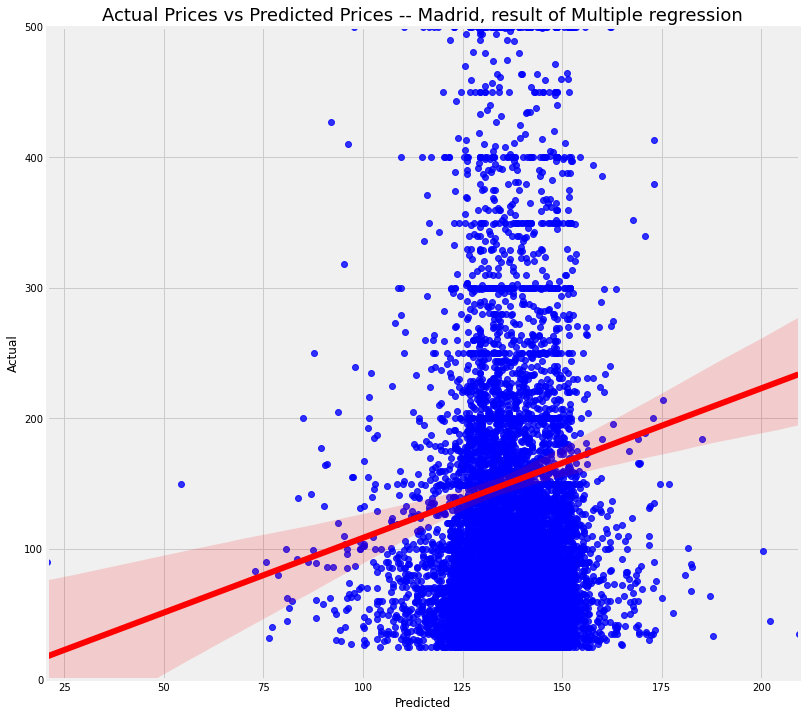

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Madrid, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/airbnb_madrid_multiple_regression.png')



In [18]:
df_result.shape

(13272, 3)

## The most mispriced [undervalued]

In [19]:
madrid_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
madrid_mispriced['%'] = (madrid_mispriced['Actual']/ madrid_mispriced['Predicted'] -1) *100
madrid_mispriced_perc = madrid_mispriced.sort_values(by=['%'], ascending=True)
madrid_mispriced_perc_plot = madrid_mispriced_perc.loc[(madrid_mispriced_perc['Predicted']>=1) & (madrid_mispriced_perc['Diff']>= 1)]
madrid_mispriced_perc_plot = madrid_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
madrid_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
16360,26,165.065218,139.065218,-84.248650
1123,25,157.509641,132.509641,-84.127956
1204,25,156.648975,131.648975,-84.040751
3647,25,156.439341,131.439341,-84.019365
17510,25,156.212549,131.212549,-83.996164


In [20]:

madrid_mispriced_1 = raw_df_madrid.loc[raw_df_madrid.id==827]
madrid_mispriced_2 = raw_df_madrid.loc[raw_df_madrid.id==748]
madrid_mispriced_3 = raw_df_madrid.loc[raw_df_madrid.index==1308]
madrid_mispriced_4 = raw_df_madrid.loc[raw_df_madrid.index==1748]
madrid_mispriced_5 = raw_df_madrid.loc[raw_df_madrid.index==894]

In [21]:
id_array = [16360, 1123, 1204, 3647, 17510]

madrid_mispriced_query = raw_df_madrid.query('index in @id_array')
madrid_mispriced_query = madrid_mispriced_query.rename({'index': 'id'}, axis=1)
madrid_mispriced_query.shape
#madrid_mispriced_query.head(1)

(5, 74)

In [22]:
#madrid_mispriced_neg = raw_df_madrid.loc[raw_df_madrid.index==4119]
madrid_mispriced_perc_1 = raw_df_madrid.loc[raw_df_madrid.id==7125]
madrid_mispriced_perc_2 = raw_df_madrid.loc[raw_df_madrid.id==3679]
madrid_mispriced_perc_3 = raw_df_madrid.loc[raw_df_madrid.id==8267]
madrid_mispriced_perc_4 = raw_df_madrid.loc[raw_df_madrid.id==2483]
madrid_mispriced_perc_5 = raw_df_madrid.loc[raw_df_madrid.id==3449]

In [23]:
madrid_mispriced = madrid_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
madrid_mispriced_1 = madrid_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

madrid_mispriced_1[:1]
madrid_mispriced_1[:2]
madrid_mispriced_1[:3]
madrid_mispriced_1[:4]
madrid_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
1123,5813663,$63.00,4.79,4.83,4.89,4.84,4.22,4.56,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/5813663
1204,6322780,$40.00,4.64,4.91,4.91,4.91,4.91,4.64,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/6322780
3647,17540342,$140.00,5.00,5.00,4.00,5.00,5.00,3.00,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/17540342
16360,51437748,$110.00,4.50,5.00,5.00,4.00,5.00,4.00,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/51437748
17510,53101510,$24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/53101510


In [24]:
dfi.export(madrid_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/airbnb_madrid_mispriced.png")



## The best score

In [25]:
madrid_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
madrid_high_value.head(6)

,Actual,Predicted,Diff
4261,35,209.306541,174.306541
9363,45,202.179567,157.179567
12524,98,200.315209,102.315209
17112,33,187.922090,154.922090
6744,64,187.073568,123.073568
11545,184,185.048329,1.048329


In [26]:
id_array = [4261, 9363, 12524, 17112, 6744]

madrid_best_score_query = raw_df_madrid.query('index in @id_array')
madrid_best_score_query = madrid_best_score_query.rename({'index': 'id'}, axis=1)
#madrid_best_score_query.head(1)

In [27]:
madrid_best_score = madrid_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
madrid_best_score_1 = madrid_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

madrid_best_score_1[:1]
madrid_best_score_1[:2]
madrid_best_score_1[:3]
madrid_best_score_1[:4]
madrid_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
4261,19153994,$120.00,1.0,5.0,5.0,3.0,5.0,1.0,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/19153994
6744,26480104,$60.00,3.0,5.0,5.0,3.0,5.0,3.0,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/26480104
9363,34710705,$450.00,5.0,5.0,5.0,5.0,5.0,2.0,NaN,https://www.airbnb.com/rooms/34710705
12524,41809121,$102.00,1.0,3.0,5.0,1.0,3.0,1.0,NaN,https://www.airbnb.com/rooms/41809121
17112,52576602,$43.00,4.0,5.0,4.5,4.5,3.0,2.5,NaN,https://www.airbnb.com/rooms/52576602


In [28]:
dfi.export(madrid_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/airbnb_madrid_best_score.png")


